In [401]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [402]:
df = pd.read_csv("framingham_heart_study.csv")

In [403]:
df.head(25)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [404]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Handle missing Values

Education

In [405]:
df['education'].fillna(df['education'].median(),inplace = True )
df.isna().any()

C:\Users\hs298\AppData\Local\Temp\ipykernel_11908\3339744491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].median(),inplace = True )


male               False
age                False
education          False
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

Cigarates Per Day

In [406]:
cmid = df.loc[df['currentSmoker'] == 1,'cigsPerDay'].median()
df.loc[(df['currentSmoker'] == 0) & (df['cigsPerDay'].isnull()) , 'cigsPerDay'] = 0
df.loc[(df['currentSmoker'] == 1) & (df['cigsPerDay'].isnull()) , 'cigsPerDay'] = cmid
df.isna().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

BP MED

In [407]:
missbpmed= df["BPMeds"].isnull()
df.loc[missbpmed & (df['prevalentHyp'] == 0),'BPMeds'] = 0
df.loc[missbpmed & (df['prevalentHyp'] == 1),'BPMeds'] = 1
df.isna().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

Cholestrol

In [408]:
misscol = df['totChol'].isnull()
colavgy = df.loc[(df['TenYearCHD']== 1),'totChol'].median()
colavgn = df.loc[(df['TenYearCHD']== 0),'totChol'].median()
df.loc[misscol & (df['TenYearCHD']== 1), 'totChol'] = colavgy
df.loc[misscol & (df['TenYearCHD']== 0), 'totChol'] = colavgn
df.isna().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

BMI

In [409]:
missbmi = df['BMI'].isnull()
bmiavgy = df.loc[(df['TenYearCHD']== 1),'BMI'].median()
bmiavgn = df.loc[(df['TenYearCHD']== 0),'BMI'].median()
df.loc[missbmi & (df['TenYearCHD']== 1), 'BMI'] = bmiavgy
df.loc[missbmi & (df['TenYearCHD']== 0), 'BMI'] = bmiavgn
df.isna().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

Heart Rate

In [410]:
misshr = df['heartRate'].isnull()
hravgy = df.loc[(df['TenYearCHD']== 1),'heartRate'].median()
hravgn = df.loc[(df['TenYearCHD']== 0),'heartRate'].median()
df.loc[misshr & (df['TenYearCHD']== 1), 'heartRate'] = hravgy
df.loc[misshr & (df['TenYearCHD']== 0), 'heartRate'] = hravgn
df.isna().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose             True
TenYearCHD         False
dtype: bool

GLUCOSE

In [411]:
missglu = df['glucose'].isnull()
gluavgy = df.loc[(df['TenYearCHD']== 1),'glucose'].median()
gluavgn = df.loc[(df['TenYearCHD']== 0),'glucose'].median()
df.loc[missglu & (df['TenYearCHD']== 1),'glucose'] = gluavgy
df.loc[missglu & (df['TenYearCHD']== 0),'glucose'] = gluavgn
df.isna().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

# EDA

In [412]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

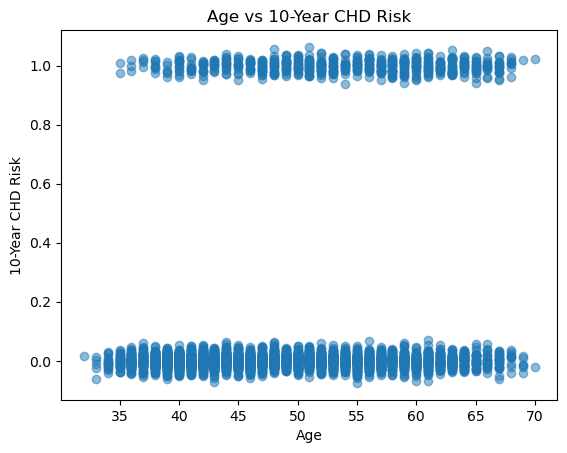

In [413]:
plt.scatter(df['age'], df['TenYearCHD'] + np.random.normal(0, 0.02, size=len(df)), alpha=0.5)
plt.xlabel('Age')
plt.ylabel('10-Year CHD Risk')
plt.title('Age vs 10-Year CHD Risk')
plt.show()

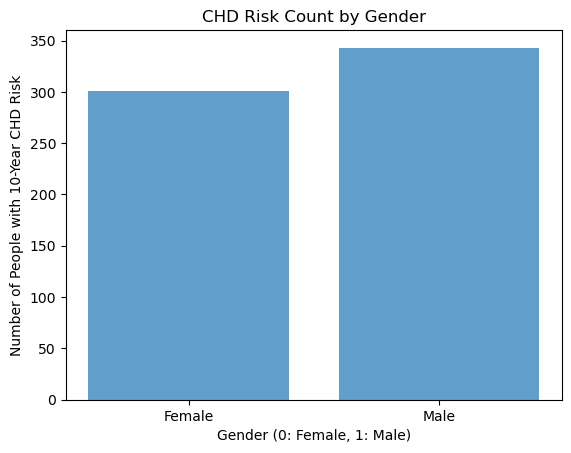

male
0    301
1    343
Name: count, dtype: int64

In [414]:
mrisk = df[df['TenYearCHD'] == 1]
gencounts = mrisk['male'].value_counts().sort_index()
plt.bar(gencounts.index, gencounts.values, alpha=0.7)
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Number of People with 10-Year CHD Risk')
plt.title('CHD Risk Count by Gender')
plt.show()
gencounts


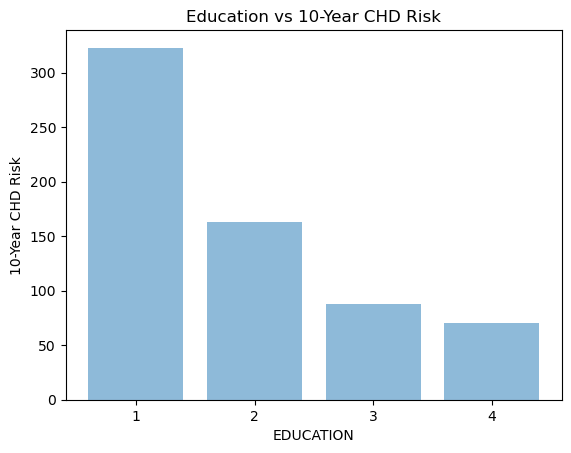

In [415]:
educount = mrisk['education'].value_counts().sort_index()
plt.bar(educount.index, educount.values, alpha=0.5)
plt.xlabel('EDUCATION')
plt.ylabel('10-Year CHD Risk')
plt.title('Education vs 10-Year CHD Risk')
plt.xticks([1,2,3,4])
plt.show()

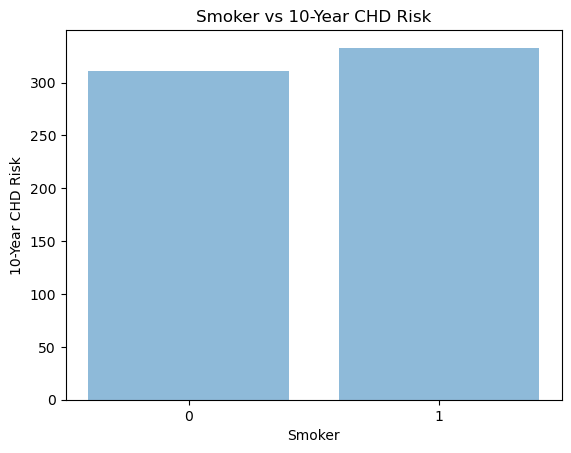

In [416]:
smocount = mrisk['currentSmoker'].value_counts().sort_index()
plt.bar(smocount.index, smocount.values, alpha=0.5)
plt.xlabel('Smoker')
plt.ylabel('10-Year CHD Risk')
plt.title('Smoker vs 10-Year CHD Risk')
plt.xticks([0,1])
plt.show()

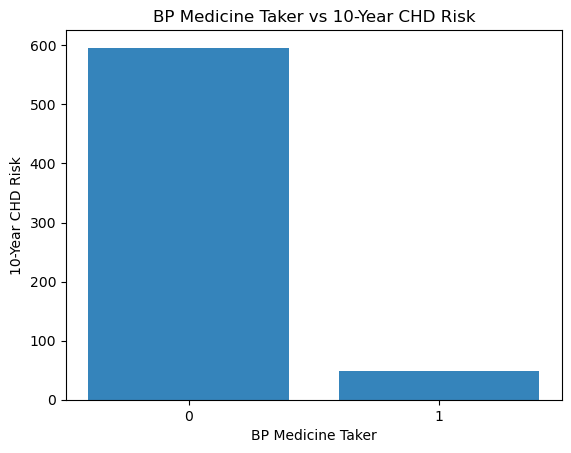

In [417]:
bpmedcount = mrisk['BPMeds'].value_counts().sort_index()
plt.bar(bpmedcount.index, bpmedcount.values, alpha=0.9)
plt.xlabel('BP Medicine Taker')
plt.ylabel('10-Year CHD Risk')
plt.title('BP Medicine Taker vs 10-Year CHD Risk')
plt.xticks([0,1])
plt.show()

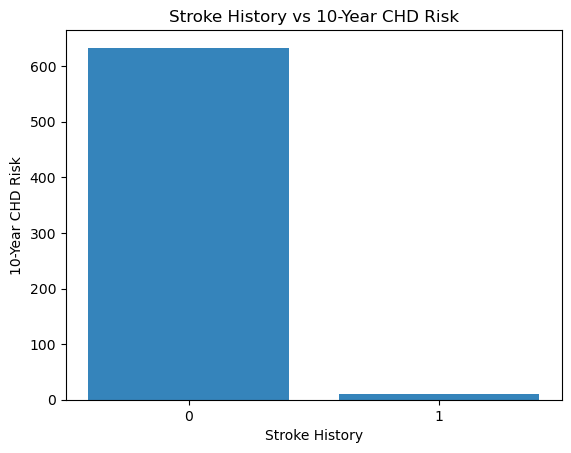

In [418]:
strokcount = mrisk['prevalentStroke'].value_counts().sort_index()
plt.bar(strokcount.index, strokcount.values, alpha=0.9)
plt.xlabel('Stroke History')
plt.ylabel('10-Year CHD Risk')
plt.xticks([0,1])
plt.title('Stroke History vs 10-Year CHD Risk')
plt.show()

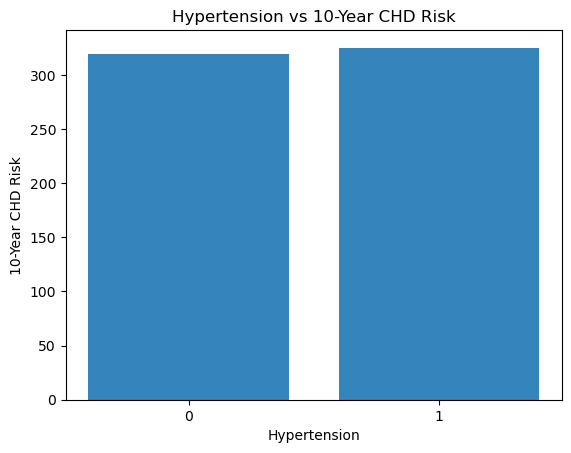

In [419]:
hypcount = mrisk['prevalentHyp'].value_counts().sort_index()
plt.bar(hypcount.index, hypcount.values, alpha=0.9)
plt.xlabel('Hypertension')
plt.ylabel('10-Year CHD Risk')
plt.xticks([0,1])
plt.title('Hypertension vs 10-Year CHD Risk')
plt.show()

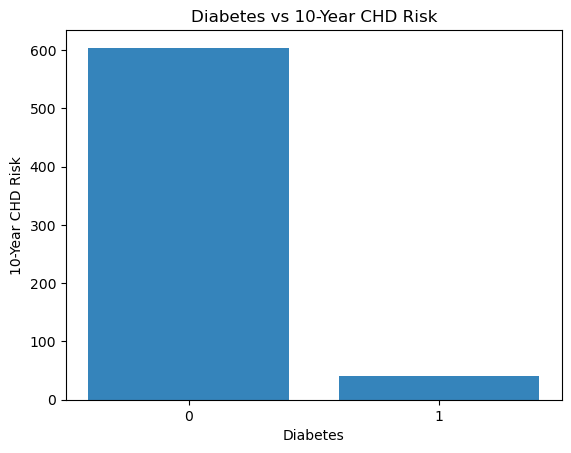

In [420]:
diacount = mrisk['diabetes'].value_counts().sort_index()
plt.bar(diacount.index, diacount.values, alpha=0.9)
plt.xlabel('Diabetes')
plt.ylabel('10-Year CHD Risk')
plt.xticks([0,1])
plt.title('Diabetes vs 10-Year CHD Risk')
plt.show()

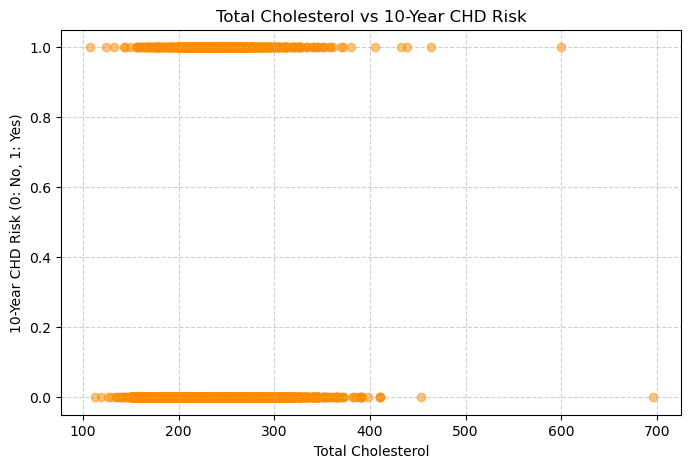

In [421]:
plt.figure(figsize=(8, 5))
plt.scatter(df['totChol'], df['TenYearCHD'], alpha=0.5, color='darkorange')
plt.xlabel('Total Cholesterol')
plt.ylabel('10-Year CHD Risk (0: No, 1: Yes)')
plt.title('Total Cholesterol vs 10-Year CHD Risk')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\hs298\AppData\Local\Temp\ipykernel_11908\2910588263.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='10-Year CHD Risk (0: No, 1: Yes)', bbox_to_anchor=(1.05, 1), loc='upper left')


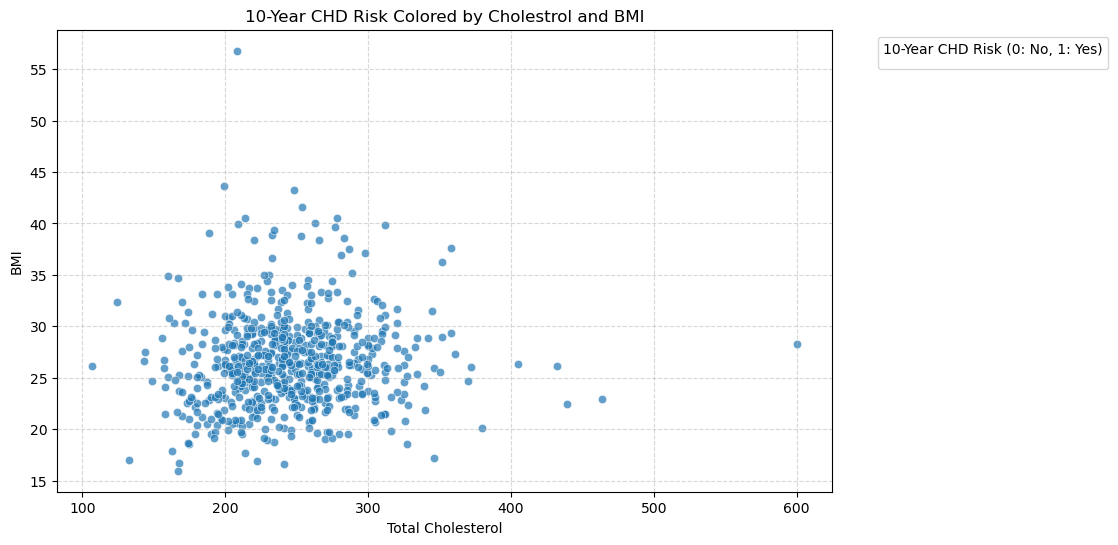

In [422]:
df= df[df['totChol'] < 620]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mrisk, x='totChol', y='BMI', alpha=0.7)
plt.xlabel('Total Cholesterol')
plt.ylabel('BMI')
plt.title('10-Year CHD Risk Colored by Cholestrol and BMI')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='10-Year CHD Risk (0: No, 1: Yes)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


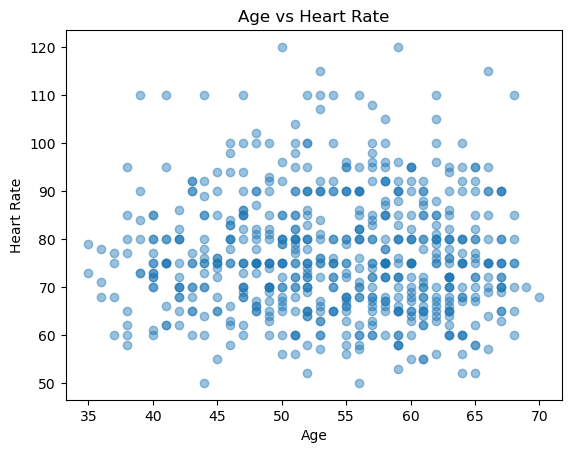

In [423]:
plt.scatter(mrisk['age'], mrisk['heartRate'], alpha=0.45)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age vs Heart Rate')
plt.show()

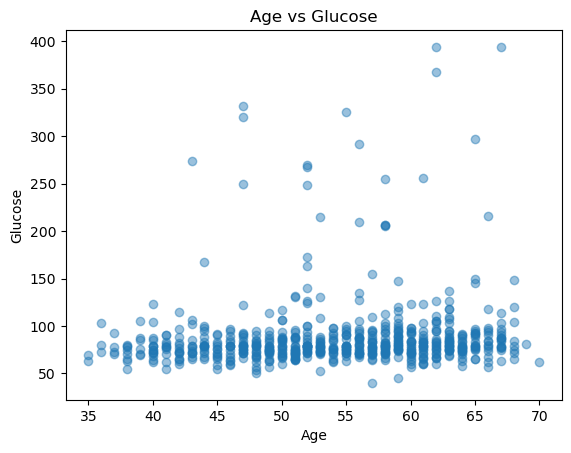

In [424]:
plt.scatter(mrisk['age'], mrisk['glucose'], alpha=0.45)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs Glucose')
plt.show()

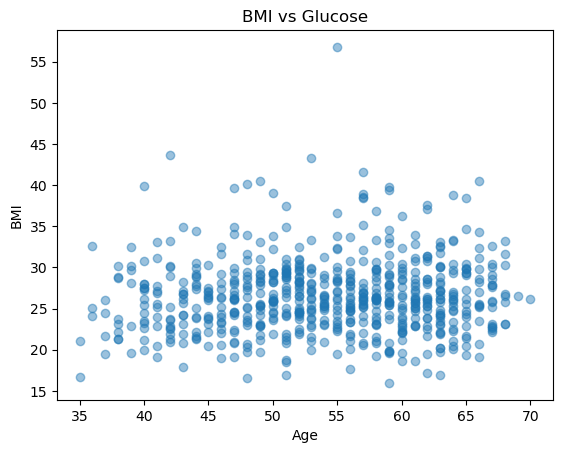

In [425]:
plt.scatter(mrisk['age'], mrisk['BMI'], alpha=0.45)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI vs Glucose')
plt.show()

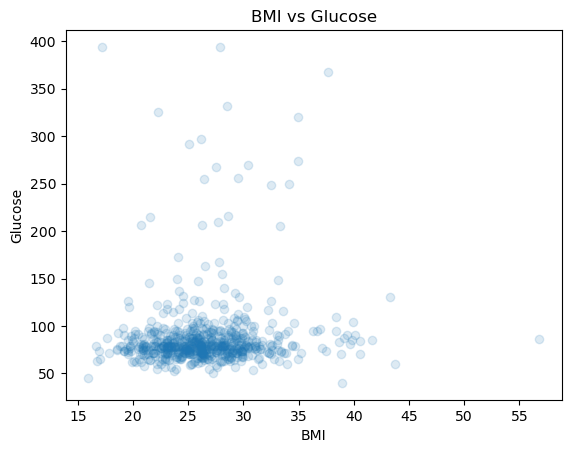

In [426]:
plt.scatter(mrisk['BMI'], mrisk['glucose'], alpha=0.15)
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('BMI vs Glucose')
plt.show()

# MODEL CREATION

Proposed Models :
<br>
    <br> 1. logistic regression
    <br> 2. decition tree
    <br> 3. random forest
    <br> 4. Xg boost

Logistic Regresion

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [460]:
X = df[['male', 'age', 
        #'education',
        'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', #'heartRate', 
        'glucose']]
y = df['TenYearCHD']

In [461]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.10,random_state=72)

In [462]:
logV1 = LogisticRegression(class_weight='balanced')
logV1.fit(x_train,y_train)

C:\Users\hs298\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [463]:
y_pred = logV1.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[237 126]
 [ 20  41]]


In [464]:
score1 = logV1.score(x_test, y_test)

In [465]:
score1

0.6556603773584906

##### Got 86.22 % accuracy using LogisticRegression Model 
##### Now Decition Tree

In [466]:
from sklearn.tree import DecisionTreeClassifier
decT1 = DecisionTreeClassifier(class_weight='balanced')
decT1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [467]:
score2 = decT1.score(x_test,y_test)
score2

0.7641509433962265

In [468]:
y_pred = decT1.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[309  54]
 [ 46  15]]


##### Got 78.2% accuracy using Decition Tree
##### Now Random Forest

In [469]:
from sklearn.ensemble import RandomForestClassifier
RanV1 = RandomForestClassifier(n_estimators = 600,class_weight='balanced')
RanV1.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=600)

In [470]:
y_pred = RanV1.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[361   2]
 [ 58   3]]


In [471]:
score3 = RanV1.score(x_test,y_test)
score3

0.8584905660377359

##### Got 86.32% Accuracy Using Random Forest 
##### Now XG Boost

In [472]:
import xgboost as xgb
xgbV1 = xgb.XGBClassifier(class_weight='balanced')
xgbV1.fit(x_train,y_train)

C:\Users\hs298\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:38:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [473]:
y_pred = xgbV1.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[349  14]
 [ 51  10]]


In [474]:
score4 = xgbV1.score(x_test,y_test)
score4

0.8466981132075472

##### XG BOOST ACCURACY = 84.9

In [475]:
from sklearn.ensemble import ExtraTreesClassifier
ETCV1 = ExtraTreesClassifier(n_estimators = 100, random_state =42,class_weight='balanced')
ETCV1.fit(x_train,y_train)
score5 = ETCV1.score(x_test,y_test)
score5

0.8608490566037735

In [476]:
y_pred = decT1.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[309  54]
 [ 46  15]]


## using Smote for balancing

In [477]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [1]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

ModuleNotFoundError: No module named 'imblearn'